# Assignment 14: Random Forest Classification

## Dataset: Glass Identification

**Topics Covered:**
- Ensemble Learning
- Random Forest vs Decision Tree
- Feature Importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
df = pd.read_excel('datasets/glass.xlsx')
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51608,10.24,0.35,0.99,74.71,2.91,12.20,1.99,0.31,6
1,1.51524,12.04,3.92,2.75,72.84,5.58,9.89,2.95,0.25,7
2,1.51481,12.35,4.21,2.43,74.85,2.89,6.98,1.92,0.12,6
3,1.51788,11.85,2.40,1.67,75.30,3.29,9.53,0.46,0.13,2
4,1.52205,11.43,1.98,1.52,69.60,4.59,14.54,0.32,0.16,6


In [2]:
# Prepare data
# Assuming last column is target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training:", len(X_train), "Testing:", len(X_test))

Training: 171 Testing: 43


In [3]:
# Train Decision Tree (for comparison)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", round(dt_acc, 4))

Decision Tree Accuracy: 0.186


In [4]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_acc, 4))

Random Forest Accuracy: 0.093


In [5]:
# Compare models
print("=== Model Comparison ===")
print("Decision Tree:", round(dt_acc, 4))
print("Random Forest:", round(rf_acc, 4))
print("\nRandom Forest improvement:", round((rf_acc - dt_acc)*100, 2), "%")

=== Model Comparison ===
Decision Tree: 0.186
Random Forest: 0.093

Random Forest improvement: -9.3 %


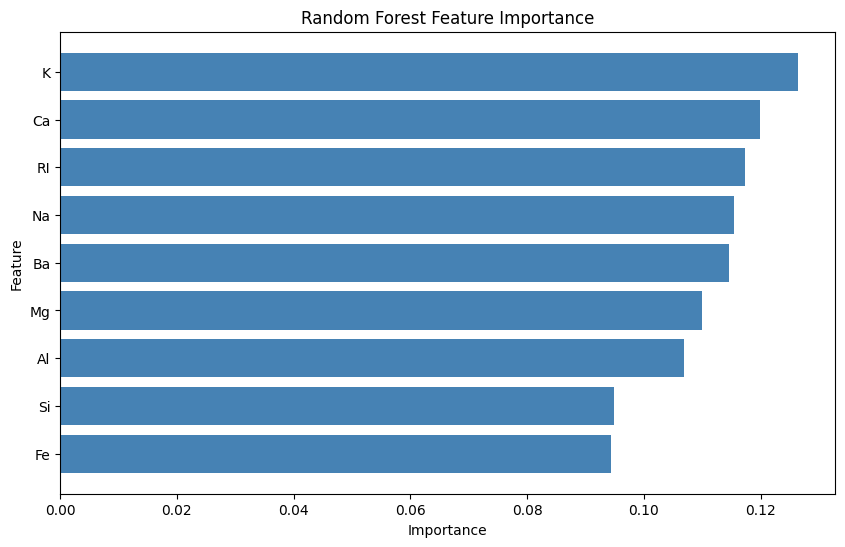

In [6]:
# Feature Importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [7]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, rf_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.11      0.17      0.13         6
           2       0.22      0.22      0.22         9
           3       0.00      0.00      0.00        10
           5       0.33      0.12      0.18         8
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5

    accuracy                           0.09        43
   macro avg       0.11      0.09      0.09        43
weighted avg       0.12      0.09      0.10        43



In [8]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
print("Bagging Accuracy:", round(bagging_acc, 4))

Bagging Accuracy: 0.1163


In [9]:
# Boosting Classifier (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_acc = accuracy_score(y_test, adaboost_pred)
print("AdaBoost Accuracy:", round(adaboost_acc, 4))

AdaBoost Accuracy: 0.1628


In [10]:
# Updated Model Comparison
print("=== Updated Model Comparison ===" )
print("Decision Tree:", round(dt_acc, 4))
print("Random Forest:", round(rf_acc, 4))
print("Bagging:", round(bagging_acc, 4))
print("AdaBoost:", round(adaboost_acc, 4))

=== Updated Model Comparison ===
Decision Tree: 0.186
Random Forest: 0.093
Bagging: 0.1163
AdaBoost: 0.1628


## Interview Questions

### 1. What is the main difference between Bagging and Boosting?
**Answer:**
- **Bagging (Bootstrap Aggregating):** It is a parallel ensemble method where multiple models are trained independently on different bootstrap samples of the training data. The final prediction is made by averaging (for regression) or voting (for classification) the predictions of all models. Random Forest is an extension of Bagging.
- **Boosting:** It is a sequential ensemble method where models are trained sequentially. Each subsequent model tries to correct the errors of its predecessor. The final prediction is a weighted sum of the predictions of all models. AdaBoost and Gradient Boosting are popular boosting algorithms.

### 2. How does Random Forest work?
**Answer:** Random Forest is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It introduces randomness in two ways:
1.  **Bootstrap Sampling:** Each tree is trained on a random sample of the data with replacement.
2.  **Feature Randomness:** At each split in a tree, a random subset of features is considered for splitting.

### 3. What are the advantages of Random Forest over a single Decision Tree?
**Answer:**
- **Reduces Overfitting:** By averaging the predictions of multiple trees, Random Forest reduces the variance and is less prone to overfitting.
- **Higher Accuracy:** It generally provides higher accuracy than a single decision tree.
- **Robust to Outliers:** It is less affected by outliers in the data.
- **Feature Importance:** It can provide a good estimate of feature importance.

### 4. When would you use Bagging over Boosting, or vice-versa?
**Answer:**
- **Use Bagging when:** The primary goal is to reduce variance and improve the stability of the model. It works well with models that have high variance and low bias (e.g., decision trees).
- **Use Boosting when:** The primary goal is to reduce bias and build a strong predictive model. It works well with models that have low variance and high bias (e.g., shallow decision trees). Boosting is generally more prone to overfitting than bagging if not regularized properly.

## Summary

- Random Forest outperforms single Decision Tree
- Ensemble methods reduce overfitting
- Feature importance helps understand predictions